# Simple Linear Regression
---

## Importing Dependecies

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from faker import Faker 
import random

In [10]:
fake = Faker()

## Generating Dataset

In [134]:
random.seed(42)
n_samples = 100

X = np.random.randint(18, 65, size=n_samples)
y = X * 1.5 + np.random.uniform(-15, 15, size=n_samples)

df = pd.DataFrame({'Age': X, 'Income': y})
df

,Age,Income
0,48,67.279661
1,28,32.875190
2,39,66.213046
3,39,53.752626
4,31,59.268054
...,...,...
95,52,79.972935
96,32,50.629827
97,48,61.344700
98,38,70.074206


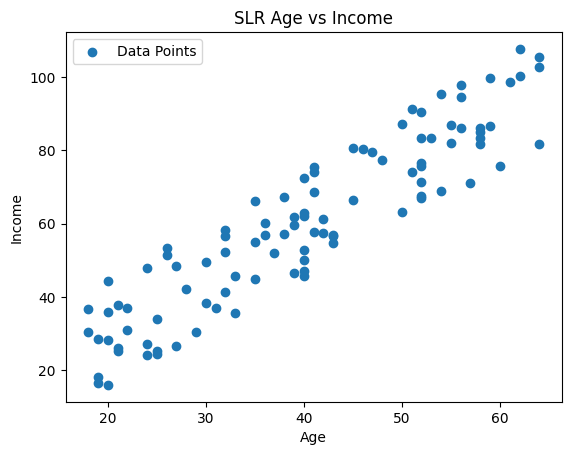

In [119]:
plt.scatter(df['Age'], df['Income'], label='Data Points')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('SLR Age vs Income')
plt.legend()
plt.show()

## Linear Model

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [121]:
x_tr, x_tt, y_tr, y_tt = train_test_split(df[['Age']], df['Income'], train_size=0.2, random_state=42)

In [122]:
model = LinearRegression()
model.fit(x_tr, y_tr)

LinearRegression()

In [123]:
y_pred = model.predict(x_tt)

In [124]:
pd.DataFrame({'Actual': y_tt, 'Predicted': y_pred})

,Actual,Predicted
83,24.525881,37.409878
53,105.369847,94.608312
70,26.239883,31.543372
45,99.759431,87.275180
44,47.999370,35.943251
...,...,...
57,75.478774,60.875902
75,67.538289,77.008794
32,91.239348,75.542167
94,45.788854,49.142890


## Model Evaluation

In [125]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [126]:
sq_error = np.sum((y_tt - y_pred)**2)
mean_sq_error = mean_squared_error(y_tt, y_pred)
print(f'Sqaured Error: {sq_error}')
print(f'Mean Sqaured Error: {mean_sq_error}')

Sqaured Error: 6853.257700976129
Mean Sqaured Error: 85.66572126220161


In [127]:
abs_error = np.sum(np.abs(y_tt - y_pred))
mean_abs_error = mean_absolute_error(y_tt, y_pred)
print(f'Absolute Error: {abs_error}')
print(f'Mean Absolute Error: {mean_abs_error}')

Absolute Error: 641.7038022133567
Mean Absolute Error: 8.021297527666958


In [128]:
r2 = r2_score(y_tt, y_pred)

n = len(x_tt)
p = x_tt.shape[1]
adj_r2 = 1 - ((1-r2)*(n-1)/(n-p-1))

print(f'Absolute Error: {r2}')
print(f'Mean Absolute Error: {adj_r2}')

Absolute Error: 0.8362178280014164
Mean Absolute Error: 0.8341180565655372


## Plotting Regression Line

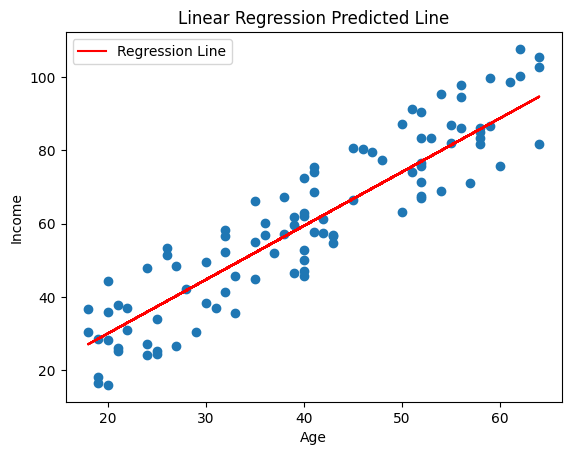

In [133]:
plt.scatter(df['Age'], df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Linear Regression Predicted Line')

plt.plot(df['Age'], model.predict(df[['Age']]), color='red', label='Regression Line')
plt.legend()